In [3]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage
from pylab import *
import scipy.signal as signal

In [4]:
#1 carregar uma imagem em escala de cinza
img = cv2.imread('eu.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
monocromatica = cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB) #preto e branco
#cv2.imshow("imagem", img)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  
print(img.shape)


(391, 483, 3)


In [56]:
#2 Função para receber um filtro e aplicar o 2D separável

#OBS: presumindo que o filtro dado será coluna ou linha (1D)

def filtro_separavel(kernel,img):
    img_linha = cv2.filter2D(img, -1, kernel) #convoluindo com um filtro 1d
    kernel = kernel.transpose()  #transpondo o kernel
    img_final = cv2.filter2D(img_linha, -1, kernel) #convoluindo com o mesmo filtro, transposto
    return(img_final)
    

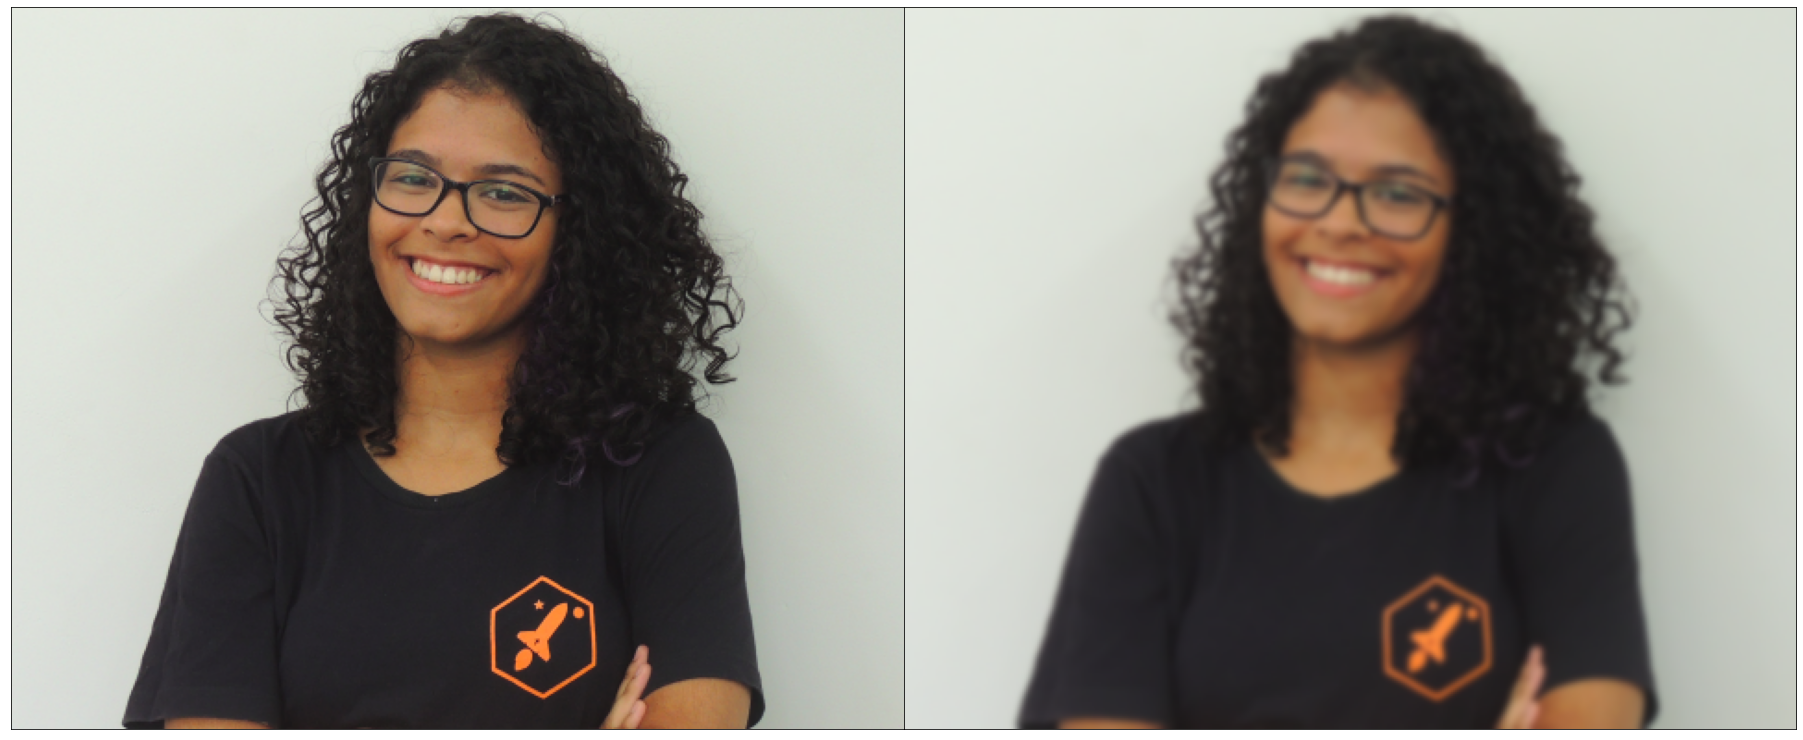

In [67]:
#testando para filtro de média, filtro gaussiano e sharpening

#filtro =  np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])  #sharpening 
#filtro = np.ones((1, 11), dtype="float32")/11   #media
filtro = cv2.getGaussianKernel(ksize=10, sigma=0)  #gaussiano

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[1].xaxis.set_major_locator(plt.NullLocator())
ax[1].yaxis.set_major_locator(plt.NullLocator())
ax[1].imshow(filtro_separavel(filtro,img))      

ax[0].xaxis.set_major_locator(plt.NullLocator())
ax[0].yaxis.set_major_locator(plt.NullLocator())
ax[0].imshow(img)




#img_borradalinha = cv2.filter2D(img, -1, kernel)
#kernel = kernel.transpose()
#img_borradacol = cv2.filter2D(img_borradalinha, -1, kernel)
#img_borradacol = img_borradacol.transpose()
#img_borradacol = cv2.cvtColor(img_borradacol, cv2.COLOR_GRAY2RGB)


#imagem_borrada = cv2.GaussianBlur(img, (1,5), 0) #convoluindo com um filtro 1d
#imagem_borrada = imagem_borrada.transpose()     #transpondo o resultado
#imagem_borrada = cv2.GaussianBlur(img, (1,5), 0) #convoluindo com o mesmo filtro
#imagem_borrada = imagem_borrada.transpose()     #transpondo o resultado


#ax[2].xaxis.set_major_locator(plt.NullLocator())
#ax[2].yaxis.set_major_locator(plt.NullLocator())
#ax[2].imshow(img_borradacol)

#img_borradalinha = cv2.cvtColor(img_borradalinha, cv2.COLOR_GRAY2RGB)





In [24]:
#tentando derivativo:
#Filtros FIR
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    return(response)
    '''subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)'''
    

In [25]:
n = 16
a = signal.firwin(n, cutoff = 0.3, window = "boxcar")

impz(a)

array([ 0.03111995, -0.00794391, -0.05347285, -0.06535571, -0.01475297,
        0.09335985,  0.21734208,  0.29970356,  0.29970356,  0.21734208,
        0.09335985, -0.01475297, -0.06535571, -0.05347285, -0.00794391,
        0.03111995])

Text(0.5, 1.0, 'Impulse response')

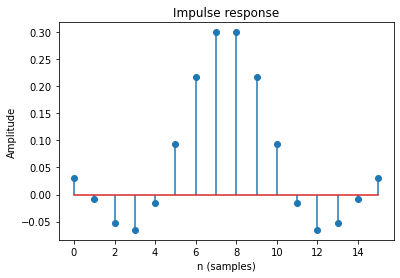

In [22]:
x = arange(0,16)
stem(x, a)
ylabel('Amplitude')
xlabel(r'n (samples)')
title(r'Impulse response')

/home/thamires/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


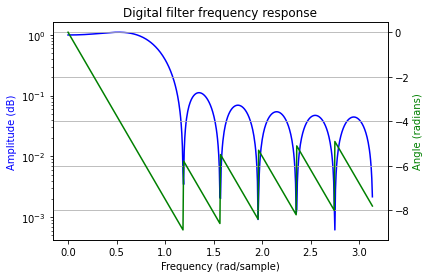

In [30]:
#plotando a resposta em frequencia (H(e^jw))
w, h = signal.freqz(impz(a), a=1)

fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.semilogy(w, np.abs(h), 'b')
plt.ylabel('Amplitude (dB)', color='b')
plt.xlabel('Frequency (rad/sample)')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()



/home/thamires/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


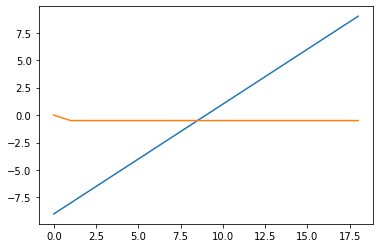

In [6]:
#Calculando a inversa de H(e^jw) = jw

plot([-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#plot(np.fft.ifft([-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))